# Análisis Exploratorio

In [1]:
import pandas as pd 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_excel('banco.xlsx')

data.head()

,ID-Cliente,Edad,Segmento,Sexo,Estado Civil,N° Productos Bancarios,Historial Crediticio,Empleo,Educación,Renta,Patrimonio (CLP)
0,1,68,2,0,0,3,Malo,2,2,14.778346,18.367462
1,2,43,2,1,3,3,Regular,0,2,14.968708,19.882131
2,3,44,2,1,1,3,Malo,1,4,14.782146,19.952883
3,4,59,2,0,1,2,Bueno,0,2,15.179449,19.832582
4,5,26,2,1,0,2,Bueno,1,2,14.829411,19.607653


In [2]:
data.shape

(1000, 11)

In [3]:
data.describe()

,ID-Cliente,Edad,Segmento,Sexo,Estado Civil,N° Productos Bancarios,Empleo,Educación,Renta,Patrimonio (CLP)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,251.811000,46.985000,1.719000,0.525000,0.704000,2.036000,0.742000,2.703000,14.469577,19.032385
std,142.715013,13.309918,0.449712,0.499624,0.786767,0.803336,0.726611,1.166255,0.600153,0.929909
min,1.000000,25.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.952666,15.573018
25%,130.750000,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,14.118040,18.534848
50%,252.000000,47.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,14.656857,19.343594
75%,375.000000,59.000000,2.000000,1.000000,1.000000,3.000000,1.000000,4.000000,14.951492,19.764607
max,500.000000,69.000000,2.000000,1.000000,3.000000,3.000000,2.000000,4.000000,15.198959,20.029235


In [4]:
data.dtypes

ID-Cliente                  int64
Edad                        int64
Segmento                    int64
Sexo                        int64
Estado Civil                int64
N° Productos Bancarios      int64
Historial Crediticio       object
Empleo                      int64
Educación                   int64
Renta                     float64
Patrimonio (CLP)          float64
dtype: object

In [5]:
data.isnull().sum()

ID-Cliente                0
Edad                      0
Segmento                  0
Sexo                      0
Estado Civil              0
N° Productos Bancarios    0
Historial Crediticio      0
Empleo                    0
Educación                 0
Renta                     0
Patrimonio (CLP)          0
dtype: int64

### Transformamos la columna 'Historial Crediticio' a numerica usando la funcion .map

In [6]:
data['Historial Crediticio'] = data['Historial Crediticio'].map({
    'Malo': 0,
    'Regular': 1,
    'Bueno': 2
})
data.dtypes

ID-Cliente                  int64
Edad                        int64
Segmento                    int64
Sexo                        int64
Estado Civil                int64
N° Productos Bancarios      int64
Historial Crediticio        int64
Empleo                      int64
Educación                   int64
Renta                     float64
Patrimonio (CLP)          float64
dtype: object

In [7]:
representative_sample = data

### Separamos las variables independientes y dependiente

In [8]:
X = representative_sample.drop('Renta', axis=1)
y = representative_sample['Renta']

### Separamos los datos en 75% para entrenar y 25% para testear

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=42)

### Normalizamos los datos para asegurar un nivel importancia similar en los datos

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

## Aplicacion de algoritmos de prediccion utilizando las librerias Sickit-Learn y GridSearchCV

## Random Forest

In [11]:
# Definición del modelo y parámetros para Grid Search
rf_reg = RandomForestRegressor()
params_rf_reg = {
    'n_estimators': [100, 300, 500, 700, 1000],  # Aumentar el número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Explorar más profundidades de los árboles
    'min_samples_split': [2, 5, 10, 15, 20],  # Refinar el número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 6, 8],  # Refinar el número mínimo de muestras por hoja
    'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.75],  # Probar diferentes estrategias de selección de características
    'bootstrap': [True, False],  # Mantener el muestreo con reemplazo y sin reemplazo
}


# Grid Search
grid_rf_reg = GridSearchCV(rf_reg, params_rf_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2', 0.5, 0.75],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [100, 300, 500, 700, 1000]},
             scoring='neg_mean_squared_error')

## XGBoost

In [12]:
xgboost_reg = xgb.XGBRegressor()
params_xgb_reg = {
    'n_estimators': [5, 10],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.75, 1.0],
    'colsample_bytree': [0.5, 1.0],
    'gamma': [0, 0.1]
}

# Grid Search
grid_xgb_reg = GridSearchCV(xgboost_reg, params_xgb_reg, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_xgb_reg.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1.0], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [2, 4, 6],
                         'n_estimators': [5, 10],
                         'subsample': [0.5, 0.75, 1.0]},
             scoring='neg_mean_squared_error')

## LightGBM

In [13]:
#!pip install lightgbm

In [14]:
# Definición del modelo y parámetros para Grid Search
lgbm_reg = lgb.LGBMRegressor()
params_lgbm = {
    'num_leaves': [50, 70, 130],  # Número de hojas en un árbol
    'learning_rate': [0.1, 0.2, 0.3],  # Tasa de aprendizaje
    'n_estimators': [5, 10, 15],  # Número de árboles a construir
    'max_depth': [-1, 5, 10],  # Profundidad máxima de los árboles
    'min_split_gain': [0.0, 0.1],  # Ganancia mínima para realizar una división
    'subsample': [0.8, 1.0],  # Submuestreo de los datos para construir los árboles
    'colsample_bytree': [0.8, 1.0]  # Submuestreo de características para construir cada árbol
}

# Grid Search
grid_lgbm_reg = GridSearchCV(lgbm_reg, params_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_lgbm_reg.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 10
[LightGBM] [Info] Start training from score 14.472295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [-1, 5, 10], 'min_split_gain': [0.0, 0.1],
                         'n_estimators': [5, 10, 15],
                         'num_leaves': [50, 70, 130], 'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error')

## Aplicacion de algoritmos de prediccion utilizando la libreria Sickit-Learn 

In [15]:
dt = RandomForestRegressor(random_state=42)

dt.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([14.9208343 , 14.8937298 , 14.9495417 , 14.49796393, 14.70708906,
       13.21010546, 13.63032156, 14.56681217, 14.89682671, 14.71553528,
       14.83425187, 14.95234963, 14.91040596, 14.94407661, 14.84203628,
       13.35624577, 13.56315697, 12.97111755, 14.94063796, 13.43435367,
       14.74566779, 14.919022  , 14.81993026, 14.32581019, 14.87843543,
       13.88534096, 13.81024978, 13.64718579, 14.72580836, 13.73205487,
       13.66000089, 14.90057645, 14.49652024, 14.94846411, 13.68059612,
       14.58630055, 14.71785379, 13.8669092 , 14.74589491, 14.91052897,
       14.62916181, 15.00381038, 13.7625564 , 15.04859   , 14.79229749,
       13.6672899 , 13.72828599, 14.5279399 , 13.32792386, 14.49408611,
       14.89629326, 14.75467268, 13.6279795 , 14.94135367, 14.89409352,
       14.71825061, 14.83796252, 14.82768673, 13.74664631, 14.34872357,
       14.8524315 , 14.98607381, 14.56977859, 14.85194128, 14.60452174,
       14.51157407, 14.91427534, 14.85797106, 14.77253442, 14.96

In [17]:
# Evaluar el rendimiento del modelo
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('El error cuadrático medio es:',mse_dt)
print('El coeficiente de determinación es:',r2_dt)

El error cuadrático medio es: 0.0536219070218835
El coeficiente de determinación es: 0.8518788951216849


In [18]:
dt2 = lgb.LGBMRegressor(random_state = 42)
dt2.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 568
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 10
[LightGBM] [Info] Start training from score 14.472295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

LGBMRegressor(random_state=42)

In [19]:
y_pred_dt2 = dt2.predict(X_test)
y_pred_dt2

array([15.01210382, 15.06877906, 14.9501984 , 14.46900034, 14.7397632 ,
       13.17796982, 13.50800755, 14.54642302, 14.82334716, 14.56259853,
       14.83056634, 15.00088244, 14.98494218, 14.93010094, 14.79811482,
       13.41002148, 13.38301288, 12.96376948, 15.02003521, 13.49295544,
       14.65000271, 15.15800998, 14.87270691, 14.32920383, 14.8644107 ,
       13.7895694 , 13.71383052, 13.41321431, 14.63862362, 13.67791587,
       13.60247751, 14.94265194, 14.53119318, 14.94132931, 13.68564755,
       14.62967052, 14.5996343 , 13.77888072, 14.75967313, 14.91422825,
       14.52382071, 14.92574924, 13.83875345, 15.03590449, 14.79959046,
       13.70881056, 13.66557344, 14.58233361, 13.37856812, 14.55755347,
       14.90408016, 14.72369711, 13.76257416, 14.99421368, 14.83445208,
       14.77597716, 14.77448736, 14.91462613, 13.7471964 , 14.40391973,
       14.79091494, 14.91140539, 14.63710177, 14.74008451, 14.55977304,
       14.55168621, 14.83669638, 14.76914472, 14.73805749, 14.98

In [20]:
mse_dt2 = mean_squared_error(y_test, y_pred_dt2)
r2_dt2 = r2_score(y_test, y_pred_dt2)

print('El error cuadrático medio es:',mse_dt2)
print('El coeficiente de determinación es:',r2_dt2)

El error cuadrático medio es: 0.0647264290326662
El coeficiente de determinación es: 0.8212046024541106


## Comparacion de Metricas

In [21]:
# Supongamos que tienes un diccionario de modelos entrenados
# donde las claves son los nombres de los modelos y los valores son los modelos ya entrenados
models = {
    #'DecisionTree': grid_dt_reg.best_estimator_,
    'RandomForest': grid_rf_reg.best_estimator_,
    'RandomForest No ajustado': dt,
    'XGBoost': grid_xgb_reg.best_estimator_,
    #'MLPRegressor': grid_mlp_reg.best_estimator_,
    #'SVR': grid_svr_reg.best_estimator_,
    #'KNeighbors': grid_knn_reg.best_estimator_,
    #'ElasticNet': grid_elastic_net_reg.best_estimator_,
    #'GradientBoosting': grid_gb_reg.best_estimator_,
    #'CatBoost': grid_catboost_reg.best_estimator_,
    'LightGBM': grid_lgbm_reg.best_estimator_,
    'LightGBM No ajustado': dt2,

}

# Calculamos las metricas
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])

print(tabulate(results, headers=['Modelo', 'MSE', 'R^2']))

Modelo                          MSE       R^2
------------------------  ---------  --------
RandomForest              0.048462   0.866132
RandomForest No ajustado  0.0536219  0.851879
XGBoost                   0.117489   0.675456
LightGBM                  0.0711667  0.803414
LightGBM No ajustado      0.0647264  0.821205


## Explicación de los modelos

El mejor modelo es el RandomForest optimizado. Este tiene el MSE más bajo de 0.0485845 y el valor R² más alto de 0.865794. Un MSE más bajo implica menos error promedio en las predicciones del modelo, y un R² más alto significa que el modelo explica mejor la variabilidad de los datos.

MSE del modelo RandomForest: 0.04846
R² del modelo RandomForest: 0.86613


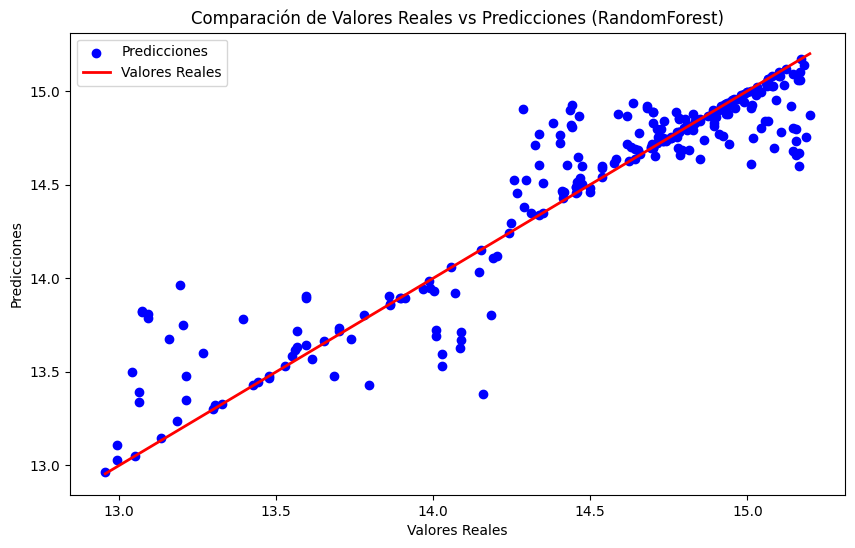

In [22]:
# Utilizar el mejor modelo encontrado por GridSearchCV
best_rf_model = grid_rf_reg.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_rf = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MSE del modelo RandomForest: {mse_rf:.5f}")
print(f"R² del modelo RandomForest: {r2_rf:.5f}")

# Visualizar valores reales vs predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación de Valores Reales vs Predicciones (RandomForest)')
plt.legend()
plt.show()